In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV

In [15]:
penguins = sns.load_dataset('penguins')
penguins.dropna(inplace=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

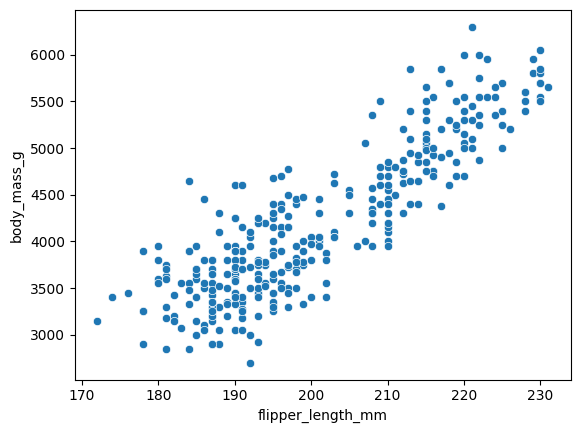

In [16]:
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g')

In [17]:
X = penguins[['flipper_length_mm']]
y = penguins['body_mass_g']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [18]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

'''
X_train  = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
'''

mod = LinearRegression()
mod.fit(X_train, y_train)

y_pred = mod.predict(X_test)
root_mean_squared_error(y_test, y_pred)

360.398001833317

We scaled the data, fit the train and predict for the test for train the model

Scaler -> LinReg

scaler.fit(train); scaler.transform(train); linreg.fit(train)

This is for prediction:

scaler.transform(test); linreg.predict(test) 

In [19]:
pipeline = Pipeline(steps = [('scaler', MinMaxScaler()), #tuple: custome name and the operation
                             ('model', LinearRegression())])
pipeline 
                    

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LinearRegression())])

In [20]:
X = penguins[['flipper_length_mm']]
y = penguins['body_mass_g']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [21]:
'''
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train, y_train)
'''
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LinearRegression())])

with pipeline we can try different in the preprocessing data set 

In [22]:
'''
X_test = scaler.transform(X_test)
y_pred = mode.predict(X_test)
'''

y_pred = pipeline.predict(X_test)
root_mean_squared_error(y_test, y_pred)

360.398001833317

In [23]:
param_grid = {'scaler__feature_range': [(0,1), (-1,1)],
              'model__fit_intercept': [True, False]}

'''
1.  scaler = MinMaxScaler(feature_range(0,1))
    model = LinearRegression(fit_intercept=True)

2.  scaler = MinMaxScaler(feature_range(0,1))
    model = LinearRegression(fit_intercept=False)

3.  scaler = MinMaxScaler(feature_range(-1,1))
    model = LinearRegression(fit_intercept=True)

4.  scaler = MinMaxScaler(feature_range(-1,1))
    model = LinearRegression(fit_intercept=False)
'''

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid = param_grid,
                           cv = 5) # cv = 5 iterate 5 times to get the avg of the error and then select the best estimators 
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', LinearRegression())]),
             param_grid={'model__fit_intercept': [True, False],
                         'scaler__feature_range': [(0, 1), (-1, 1)]})

In [24]:
grid_search.best_params_

{'model__fit_intercept': True, 'scaler__feature_range': (0, 1)}

column transformer numericcal and categorical then you put in the pipeline 

In [25]:
from datasets import load_dataset # Load datasets, specifically the IMDb dataset in this case, from the Hugging Face library.
import pandas as pd # Import pandas, a powerful library for data manipulation and analysis.
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer # Import TF-IDF Vectorizer from Scikit-learn to convert text into numerical features
from sklearn.model_selection import train_test_split # Import train_test_split from Scikit-learn to split data into training and testing sets.
import re # Import the re library to use regular expressions for cleaning and preprocessing text data.
import nltk # Import NLTK (Natural Language Toolkit), a popular library for natural language processing

In [26]:
nltk.download('punkt') # Download the 'punkt' tokenizer model, which is used to tokenize text into words or sentences.
nltk.download('stopwords') # Download the 'stopwords' corpus, which contains a list of common words (e.g., 'the', 'is', 'and') that are usually removed during text preprocessing as they do not add meaningful information.
nltk.download('punkt_tab') # Download the 'punkt_tab' tokenizer table, which enhances the functionality of 'punkt' by handling abbreviations, punctuation, and complex sentence structures.
from nltk.corpus import stopwords # Import stopwords from NLTK to use the pre-defined list of stopwords in English.
from nltk.tokenize import word_tokenize # Import the word_tokenize function from NLTK, which splits a string of text into individual words (tokens).
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dianaterraza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dianaterraza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/dianaterraza/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [27]:
dataset = load_dataset('imdb') # Load the IMDb dataset from the Hugging Face library.
sample_size = 500

train_sample = dataset['train'].shuffle(seed=42).select(range(sample_size)) # Shuffle the training data and select a random sample of 500 examples.
test_sample = dataset['test'].shuffle(seed=42).select(range(sample_size)) # Shuffle the testing data and select a random sample of 500 examples.

train_df = pd.DataFrame(train_sample) # Convert the training data into a Pandas DataFrame for easier manipulation.
test_df = pd.DataFrame(test_sample) # Convert the testing data into a Pandas DataFrame for easier manipulation.

train_df.rename(columns = {'text':'review', 'label': 'sentiment'}, inplace=True)
test_df.rename(columns = {'text': 'review', 'label': 'sentiment'}, inplace=True)

In [28]:
stop_words = set(stopwords.words('english')) # Create a set of English stopwords using NLTK.
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = word_tokenize(text)  # Tokenize text
    words = [word for word in words if word not in stop_words and len(word) > 1]  # Remove stopwords and short words
    return ' '.join(words)  # Return cleaned text as a string

train_df['clean_review'] = train_df['review'].apply(clean_text) # Apply the clean_text function to the 'review' column in the training data.
test_df['clean_review'] = test_df['review'].apply(clean_text) # Apply the clean_text function to the 'review' column in the testing data.

In [29]:
from sklearn.linear_model import LogisticRegression

Create the pipeline:  

In [30]:
pipeline = Pipeline(steps = [('vectorizer', TfidfVectorizer()),
                             ('model', LogisticRegression())])

In [31]:
pipeline

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('model', LogisticRegression())])

Define the parameter grid :

In [32]:
param_grid = {'vectorizer__ngram_range': [(1,1), (1,3)], #ngrams is how we are going to create tokens
              'model__fit_intercept': [True, False]}

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid = param_grid,
                           cv = 5)

grid_search.fit(train_df['clean_review'], train_df['sentiment'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__fit_intercept': [True, False],
                         'vectorizer__ngram_range': [(1, 1), (1, 3)]})

In [33]:
grid_search.best_params_

{'model__fit_intercept': False, 'vectorizer__ngram_range': (1, 1)}

In [34]:
pipeline = Pipeline(steps = [('vectorizer', TfidfVectorizer()),
                             ('model', LogisticRegression())])

In [35]:
param_grid = {'vectorizer' : [TfidfVectorizer(), CountVectorizer()]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid = param_grid,
                           cv = 5)
grid_search.fit(train_df['clean_review'], train_df['sentiment'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('model', LogisticRegression())]),
             param_grid={'vectorizer': [TfidfVectorizer(), CountVectorizer()]})

In [36]:
grid_search.best_params_

{'vectorizer': TfidfVectorizer()}

This means that TFIDFVectorizer works better for this case 

In [37]:
param_grid = [{
    'vectorizer': [TfidfVectorizer()],
    'vectorizer__ngram_range': [(1,1),(1,3)]
},
{
    'vectorizer': [CountVectorizer()],
    'vectorizer__ngram_range': [(1,1),(1,3)]
}]

In [38]:
pipeline = Pipeline(steps = [('vectorizer', CountVectorizer()),
                            ('model', LogisticRegression())])

param_grid = {'vectorizer': [TfidfVectorizer(), CountVectorizer()],
              'model': [LogisticRegression(), RandomForestClassifier()]}

pipelines are very good because helps to avoid data leakage